In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hospitalization_details=pd.read_csv('/content/drive/MyDrive/capstone project/healthcare insurance analysis/Capstone_1/Hospitalisation details.csv')
hospitalization_details.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [ ]:
medical_examination = pd.read_csv('/content/drive/MyDrive/capstone project/healthcare insurance analysis/Capstone_1/Medical Examinations.csv')
medical_examination.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [ ]:
names = pd.read_excel('/content/drive/MyDrive/capstone project/healthcare insurance analysis/Capstone_1/Names.xlsx')
names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [ ]:
merged_df = pd.merge(hospitalization_details, medical_examination, on="Customer ID")
merged_df = pd.merge(merged_df, names, on="Customer ID")

In [ ]:
merged_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

In [ ]:
# check for missing values
missing_values = merged_df.isnull().sum()
missing_values

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

In [ ]:
trivial_rows = merged_df[merged_df.apply(lambda x: x.astype(str).str.contains(r'\?')).any(axis=1)]
trivial_rows

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
11,Id2324,1999,Dec,26,0,700.00,?,tier - 3,R1013,22.240,5.04,No,No,No,No major surgery,No,"Duffy, Ms. Meghan K"
13,Id2322,2002,?,19,0,750.00,tier - 3,tier - 1,R1012,21.380,8.01,No,No,No,No major surgery,No,"Street, Ms. Holly"
17,Id2318,1996,?,18,0,770.38,tier - 3,?,R1012,18.820,5.51,yes,No,No,No major surgery,No,"Gagnon, Ms. Candice M"
542,Id1793,1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,18.905,4.91,yes,No,No,1,No,"Capriolo, Mr. Michael"
1046,Id1289,?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,24.320,11.56,yes,No,No,1,No,"Levine, Ms. Annie J."
1049,Id1286,?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,29.370,8.01,yes,No,No,1,No,"Ainsley, Ms. Katie M."
1700,Id635,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,25.175,4.96,No,yes,No,1,?,"Bruns, Mr. Zachary T"
1775,Id560,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,23.980,4.90,No,No,No,No major surgery,?,"Pearlman, Mr. Oz"
2165,Id170,2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,37.620,6.32,yes,yes,No,2,yes,"Torphy, Mr. Bobby"
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"


In [ ]:
merged_df.shape

(2335, 17)

In [ ]:
# Filter out the rows with trivial values
filtered_df = merged_df[~merged_df.apply(lambda x: x.astype(str).str.contains(r'\?')).any(axis=1)]
filtered_df.shape

(2325, 17)

In [ ]:
filtered_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [ ]:
filtered_df.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"


In [ ]:
df=filtered_df

In [ ]:
df.month.unique()

array(['Jul', 'Nov', 'Jun', 'Sep', 'Dec', 'Aug', 'Oct'], dtype=object)

In [ ]:
month_mapping = { 'Jun': 6, 'Jul': 7, 'Aug': 8,
                 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['month'] = df['month'].map(month_mapping)

<ipython-input-136-549fa0b7cbbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].map(month_mapping)


In [ ]:
df.month.unique()

array([ 7, 11,  6,  9, 12,  8, 10])

In [ ]:
df.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,7,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,11,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"


In [ ]:
df['Hospital tier'].unique()

array(['tier - 2', 'tier - 3', 'tier - 1'], dtype=object)

In [ ]:
hospitaltier_mapping = {'tier - 2': 2, 'tier - 3': 3, 'tier - 1': 1}
df['Hospital tier'] = df['Hospital tier'].map(hospitaltier_mapping)

<ipython-input-140-25b1903aae59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hospital tier'] = df['Hospital tier'].map(hospitaltier_mapping)


In [ ]:
df['Hospital tier'].unique()

array([2, 3, 1])

In [ ]:
df['City tier'].unique()

array(['tier - 3', 'tier - 1', 'tier - 2'], dtype=object)

In [ ]:
Citytier_mapping = {'tier - 2': 2, 'tier - 3': 3, 'tier - 1': 1}
df['City tier'] = df['City tier'].map(Citytier_mapping)

<ipython-input-143-a199ff06fd65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City tier'] = df['City tier'].map(Citytier_mapping)


In [ ]:
df['City tier'].unique()

array([3, 1, 2])

In [ ]:
df['State ID'].unique()

array(['R1013', 'R1012', 'R1011', 'R1015', 'R1019', 'R1016', 'R1018',
       'R1025', 'R1024', 'R1023', 'R1014', 'R1021', 'R1017', 'R1020',
       'R1026', 'R1022'], dtype=object)

In [ ]:
# Create a new column to store the dummy variable information
df['State_Category'] = 'Other'

# Assign the states of interest to the 'State_Category' column
df.loc[df['State ID'].isin(['R1011', 'R1012', 'R1013']), 'State_Category'] = df['State ID']

# Create dummy variables for the 'State_Category' column
df_states = pd.get_dummies(df['State_Category'], prefix='State')

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, df_states], axis=1)

# Drop the 'State_Category' column and one dummy variable (e.g., 'State_Other')
df.drop(['State_Category', 'State_Other'], axis=1, inplace=True)


<ipython-input-146-461befd784c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State_Category'] = 'Other'


In [ ]:
df.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013
0,Id2335,1992,7,9,0,563.84,2,3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",0,0,1
1,Id2334,1992,11,30,0,570.62,2,1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",0,0,1


In [ ]:
df['Heart Issues'].unique()

array(['No', 'yes'], dtype=object)

In [ ]:
# Use binary encoding 
#Replace "Yes" with 1 to indicate the presence of heart issues.
#Replace "No" with 0 to indicate the absence of heart issues.
# Replace "Yes" with 1 and "No" with 0
df['Heart Issues'] = df['Heart Issues'].replace({'yes': 1, 'No': 0})


In [ ]:
df['Heart Issues'].unique()

array([0, 1])

In [ ]:
df['Any Transplants'].unique()

array(['No', 'yes'], dtype=object)

In [ ]:
# Use binary encoding 
#Replace "Yes" with 1 to indicate the Transplants.
#Replace "No" with 0 to indicate the non Transplants.
# Replace "Yes" with 1 and "No" with 0
df['Any Transplants'] = df['Any Transplants'].replace({'yes': 1, 'No': 0})

In [ ]:
df['Any Transplants'].unique()

array([0, 1])

In [ ]:
df['Cancer history'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Use binary encoding 
#Replace "Yes" with 1 to indicate presence of cancer.
#Replace "No" with 0 to indicate absence of cancer.
# Replace "Yes" with 1 and "No" with 0
df['Cancer history'] = df['Cancer history'].replace({'Yes': 1, 'No': 0})

In [ ]:
df['Cancer history'].unique()

array([0, 1])

In [ ]:
df.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013
0,Id2335,1992,7,9,0,563.84,2,3,R1013,17.58,4.51,0,0,0,1,No,"German, Mr. Aaron K",0,0,1
1,Id2334,1992,11,30,0,570.62,2,1,R1013,17.60,4.39,0,0,0,1,No,"Rosendahl, Mr. Evan P",0,0,1


In [ ]:
df['smoker'].unique()

array(['No', 'yes'], dtype=object)

In [ ]:
# Use binary encoding 
#Replace "Yes" with 1 to indicate smoker.
#Replace "No" with 0 to indicate no smoker.
# Replace "Yes" with 1 and "No" with 0
df['smoker'] = df['smoker'].replace({'yes': 1, 'No': 0})

In [ ]:
df['NumberOfMajorSurgeries'].unique()

array(['1', 'No major surgery', '2', '3'], dtype=object)

In [ ]:
# Replace 'No major surgery' with 0
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery', 0)

# Convert the remaining string values to integers
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'], errors='coerce')


In [ ]:
df['NumberOfMajorSurgeries'].unique()

array([1, 0, 2, 3])

In [ ]:
df.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013
0,Id2335,1992,7,9,0,563.84,2,3,R1013,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K",0,0,1
1,Id2334,1992,11,30,0,570.62,2,1,R1013,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2334
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   object 
 2   month                   2325 non-null   int64  
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   int64  
 7   City tier               2325 non-null   int64  
 8   State ID                2325 non-null   object 
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   int64  
 12  Any Transplants         2325 non-null   int64  
 13  Cancer history          2325 non-null   int64  
 14  NumberOfMajorSurgeries  2325 non-null   

In [ ]:
import datetime

# Convert the year column to integer
df['year'] = df['year'].astype(int)

# Calculate the current year and month
current_date = datetime.datetime.now()
current_year = current_date.year
current_month = current_date.month

# Calculate the ages based on year and month
df['Age'] = current_year - df['year'] - ((current_month < df['month']).astype(int))



In [ ]:
df.sample(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013,Age
204,Id2131,2003,8,30,0,2128.43,2,1,R1012,30.495,...,0,0,1,1,0,"Fisher, Ms. Evan",0,1,0,19
1912,Id423,1972,9,14,1,24520.26,2,3,R1011,27.600,...,0,0,0,2,1,"Sabo, Ms. Emily",1,0,0,50
1657,Id678,1991,8,21,3,14630.52,2,3,R1011,53.480,...,0,0,0,0,0,"Muhly, Ms. Margaret E",1,0,0,31
522,Id1813,1977,12,4,2,4699.47,2,3,R1013,15.610,...,0,0,0,0,0,"Scanlin, Mr. Timothy P.",0,0,1,45
1398,Id937,1984,11,26,3,11730.82,3,3,R1026,36.800,...,0,0,0,1,0,"Savage, Mrs. Ulrike",0,0,0,38


In [ ]:
# Extract the salutations from the names
df['Salutation'] = df['name'].str.extract(r'(Mr\.|Mrs\.|Miss|Master|Ms\.)')

In [ ]:
df['Salutation'].unique()

array(['Mr.', 'Ms.', 'Mrs.', 'Master'], dtype=object)

In [ ]:
df['name'].sample(5)

1509            Hails, Ms.  Kate A.
90      Davenport, Ms.  Katherine A
977             Bishop, Mr.  Justin
942             Dayton, Ms.  Gina M
65           Reilly, Ms.  Katharine
Name: name, dtype: object

In [ ]:
# Define the mapping dictionary for salutations and genders
salutation_gender_map = {
    'Mr.': 'Male',
    'Master': 'Male',
    'Mrs.': 'Female',
    'Ms.': 'Female'
}

# Map the salutations to genders
df['Gender'] = df['Salutation'].map(salutation_gender_map)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

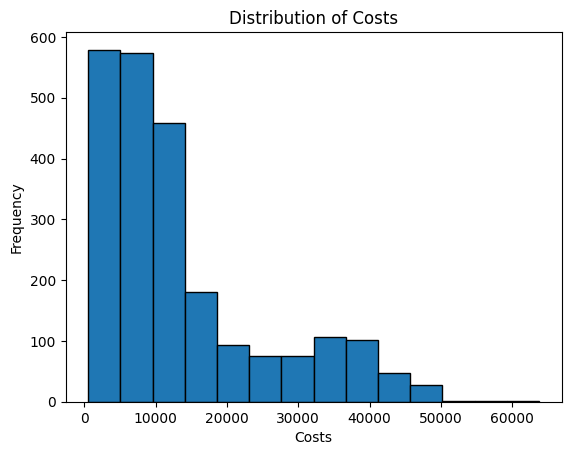

In [ ]:
# Plotting a histogram
plt.hist(df['charges'], bins=14, edgecolor='black')
plt.xlabel('Costs')
plt.ylabel('Frequency')
plt.title('Distribution of Costs')
plt.show()

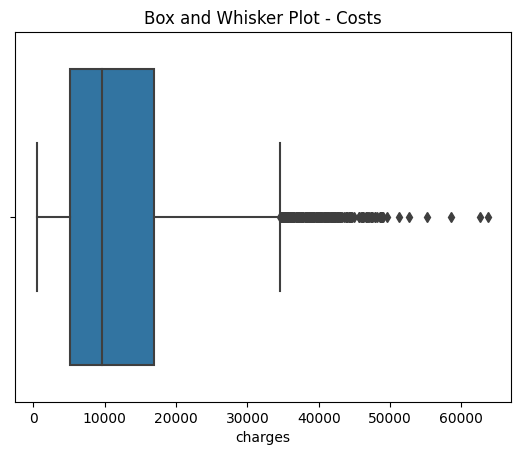

In [ ]:
# Plotting a box and whisker plot
sns.boxplot(x=df['charges'])
plt.title('Box and Whisker Plot - Costs')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


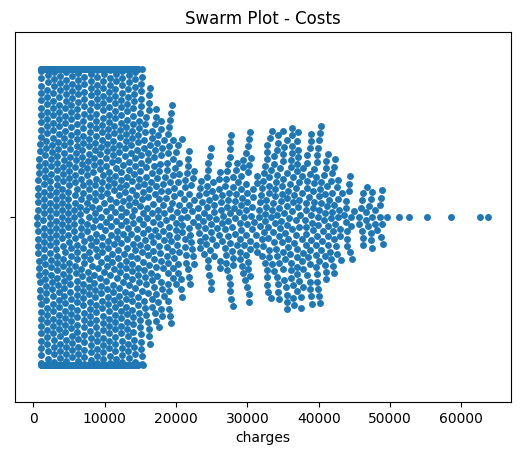

In [ ]:
# Plotting a swarm plot
sns.swarmplot(x=df['charges'])
plt.title('Swarm Plot - Costs')
plt.show()

In [ ]:
# Calculate percentile values
percentiles = np.percentile(df['charges'], [25, 50, 75])
percentiles

array([ 5116.5 ,  9634.54, 16903.5 ])



*   The 25th percentile value of 5116.5 indicates that 25% of the costs fall below this threshold, representing relatively lower costs incurred by a quarter of the patients.
*   The 50th percentile (median) value of 9634.54 suggests that half of the patients had costs below this value, providing an estimate of the typical cost incurred.


*   The 75th percentile value of 16903.5 signifies that 75% of the costs fall below this threshold, with a smaller percentage of patients incurring higher costs.
*   The positively skewed distribution of costs indicates a majority of lower-cost medical events, with a smaller proportion of higher-cost cases.


*   The majority of costs incurred by patients in the dataset are relatively low, with a significant portion falling within the 0-10000 range.
*   This indicates that healthcare services provided to these patients have lower associated costs, likely involving less complex treatments, routine check-ups, or preventive care.


*   Stakeholders in the healthcare industry, such as insurance providers, may need to adjust their pricing and risk assessment strategies based on the prevalence of low-cost medical events among policyholders.
*   Healthcare providers should consider optimizing resources and services to meet the demand for low-cost treatments and prioritize preventive care measures.











/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


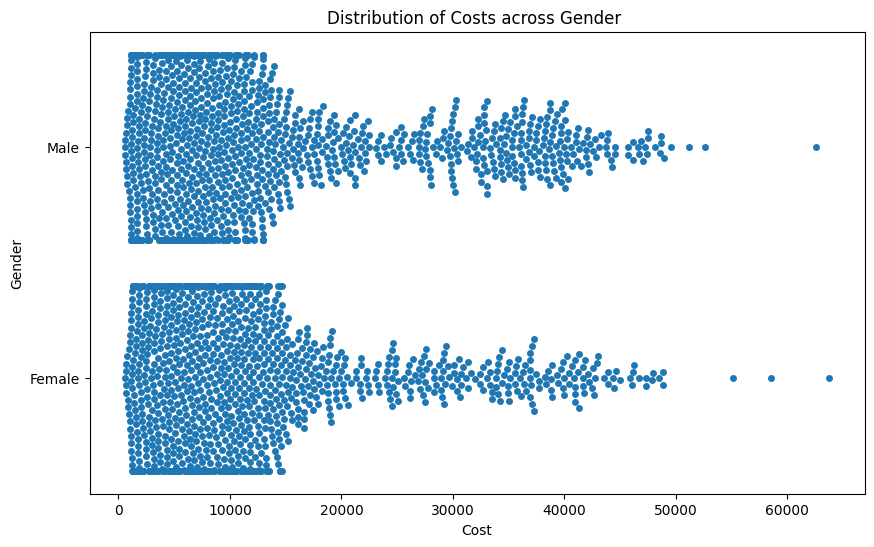

In [ ]:
# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='charges', y='Gender', data=df)
plt.ylabel('Gender')
plt.xlabel('Cost')
plt.title('Distribution of Costs across Gender ')
plt.show()

when considering the distribution of costs based on gender, both male and female patients exhibit a similar cost pattern. The majority of the costs for both genders fall within the range of 5000 to 16000. This range indicates that a significant proportion of patients, regardless of gender, experience healthcare costs within this specific range.These findings provide insights into the cost differences across hospital tiers and highlight the common cost range for male and female patients. 

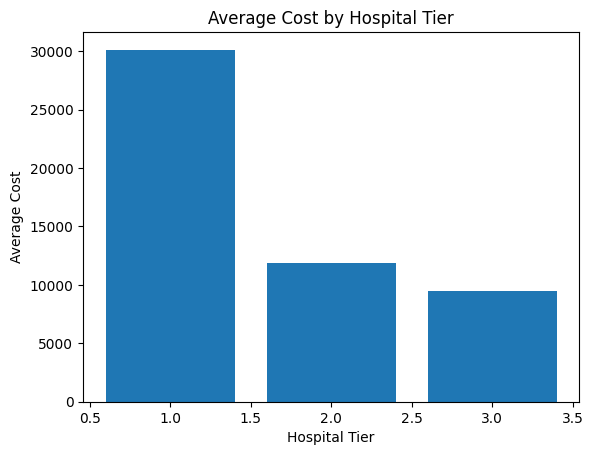

In [ ]:
# Calculate the average cost by hospital tier
average_costs = df.groupby('Hospital tier')['charges'].mean()

# Create a bar plot
plt.bar(average_costs.index, average_costs)

# Set plot labels and title
plt.xlabel('Hospital Tier')
plt.ylabel('Average Cost')
plt.title('Average Cost by Hospital Tier')

# Show the plot
plt.show()

After analyzing the graph comparing hospital tiers and costs, it can be observed that tier one hospitals tend to have higher costs compared to other tiers. This suggests that patients receiving healthcare services at tier one hospitals may incur higher expenses, which could be attributed to factors such as specialized treatments, advanced medical technologies, or the availability of specialized healthcare professionals.

In [ ]:
# Calculate the median cost by hospital tier
median_costs = df.groupby('Hospital tier')['charges'].median()
median_costs

Hospital tier
1    32097.435
2     7168.760
3    10676.830
Name: charges, dtype: float64

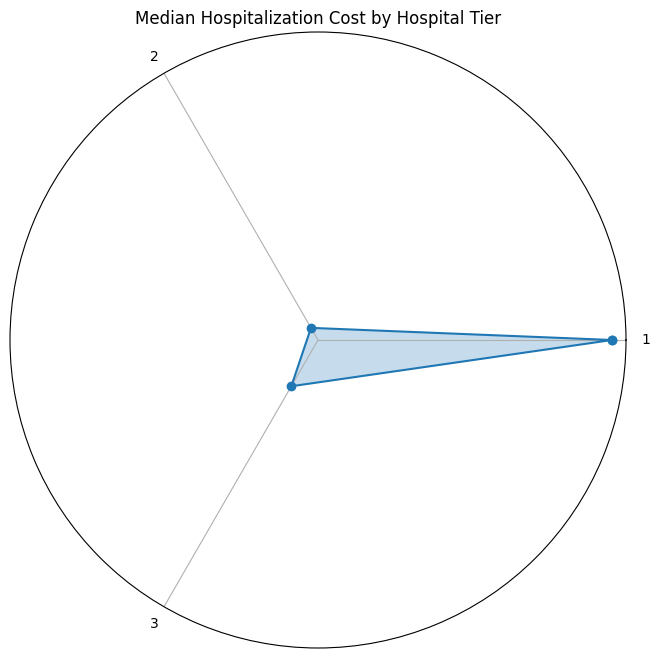

In [ ]:
# Define the number of variables (hospital tiers)
num_tiers = len(median_costs)

# Create a list of tier labels
tier_labels = median_costs.index.tolist()

# Create a list of median cost values
cost_values = median_costs.values.tolist()

# Duplicate the first value to close the circle
cost_values.append(cost_values[0])

# Calculate evenly spaced angles for the radar chart
angles = np.linspace(0, 2*np.pi, num_tiers, endpoint=False).tolist()
angles.append(angles[0])

# Create a radar chart
plt.figure(figsize=(8, 8))
plt.polar(angles, cost_values, marker='o')

# Set the angle ticks and labels
plt.xticks(angles[:-1], tier_labels)
plt.yticks([])  # Hide the radial axis labels

# Fill the area under the curve
plt.fill(angles, cost_values, alpha=0.25)

# Set plot title
plt.title('Median Hospitalization Cost by Hospital Tier')

# Show the radar chart
plt.show()

The analysis of the radar chart reveals that the median hospitalization cost for tier 1, tier 2, and tier 3 hospitals are approximately $ 32097.435, $7168.760, and $10676.830, respectively

In [ ]:
frequency_table = df.groupby(['City tier', 'Hospital tier']).size().unstack()
frequency_table

Hospital tier,1,2,3
City tier,,,
1,85,403,241
2,106,479,222
3,109,452,228


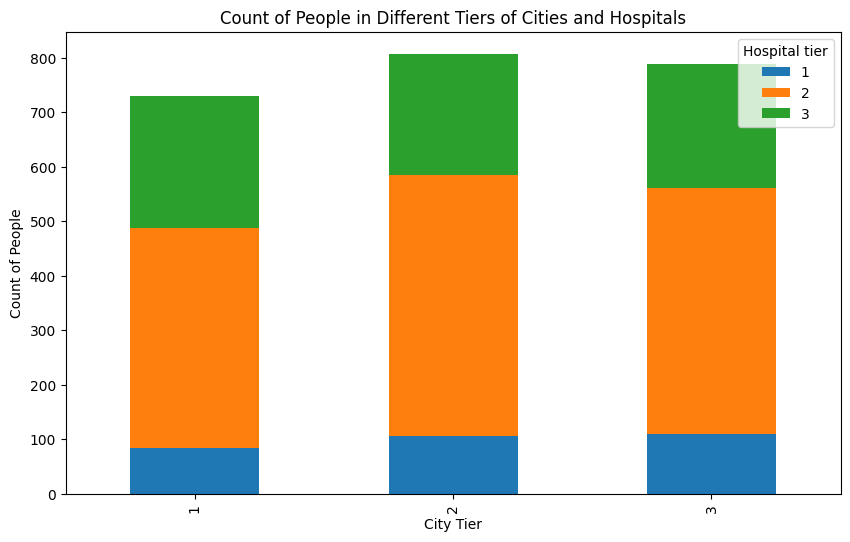

In [ ]:
# Create a stacked bar chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('City Tier')
plt.ylabel('Count of People')
plt.title('Count of People in Different Tiers of Cities and Hospitals')

# Show the plot
plt.show()



*   In City Tier 1, the majority of people (85) are associated with Hospital Tier 1, followed by 403 in Hospital Tier 2 and 241 in Hospital Tier 3.

*   In City Tier 2, the count is relatively higher across all hospital tiers, with 106 in Hospital Tier 1, 479 in Hospital Tier 2, and 222 in Hospital Tier 3.
*   City Tier 3 also demonstrates a similar pattern, with 109 people in Hospital Tier 1, 452 in Hospital Tier 2, and 228 in Hospital Tier 3.



In [ ]:
df.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013,Age,Salutation,Gender
0,Id2335,1992,7,9,0,563.84,2,3,R1013,17.58,...,0,1,0,"German, Mr. Aaron K",0,0,1,30,Mr.,Male
1,Id2334,1992,11,30,0,570.62,2,1,R1013,17.60,...,0,1,0,"Rosendahl, Mr. Evan P",0,0,1,30,Mr.,Male


In [ ]:
#Test the following null hypotheses:
#a. The average hospitalization costs for the three types of hospitals are not significantly different

# Extract the cost values for each hospital tier
hospital_tier_1_costs = df.loc[df['Hospital tier'] == 1, 'charges']
hospital_tier_2_costs = df.loc[df['Hospital tier'] == 2, 'charges']
hospital_tier_3_costs = df.loc[df['Hospital tier'] == 3, 'charges']



1. Null hypothesis (H0): The average hospitalization costs for the three types of hospitals are equal.
2. Alternative hypothesis (HA): The average hospitalization costs for the three types of hospitals are significantly different.

In [ ]:
import scipy.stats as stats
# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(hospital_tier_1_costs, hospital_tier_2_costs, hospital_tier_3_costs)
print(f_statistic)
print(p_value)
# Compare p-value to significance level
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences in average hospitalization costs.")
else:
    print("Fail to reject the null hypothesis. Average hospitalization costs are not significantly different.")

493.98956631117636
1.7738221310852664e-179
Reject the null hypothesis. There are significant differences in average hospitalization costs.


In [ ]:
#b. The average hospitalization costs for the three types of cities are not significantly different
# Extract the cost values for each city tier
city_tier_1_costs = df.loc[df['City tier'] == 1, 'charges']
city_tier_2_costs = df.loc[df['City tier'] == 2, 'charges']
city_tier_3_costs = df.loc[df['City tier'] == 3, 'charges']

1. Null hypothesis (H0): The average hospitalization costs for the three types of city are equal.
2. Alternative hypothesis (HA): The average hospitalization costs for the three types of city are significantly different.

In [ ]:
# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(city_tier_1_costs, city_tier_2_costs, city_tier_3_costs)
print(f_statistic)
print(p_value)
# Compare p-value to significance level
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences in average hospitalization costs.")
else:
    print("Fail to reject the null hypothesis. Average hospitalization costs are not significantly different.")

1.4543557561814688
0.23376344386881315
Fail to reject the null hypothesis. Average hospitalization costs are not significantly different.


In [ ]:
df.groupby('City tier')['charges'].mean()

City tier
1    13009.972579
2    13471.919281
3    14045.312066
Name: charges, dtype: float64

In [ ]:
df['smoker'].unique()

array([0, 1])

In [ ]:
#The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers
# Extract the cost values for smokers and nonsmokers
smoker_costs = df.loc[df['smoker'] == 1, 'charges']
nonsmoker_costs = df.loc[df['smoker'] == 0, 'charges']


1. Null hypothesis (H0): The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers
2. Alternative hypothesis (HA): The average hospitalization cost for smokers is  significantly different from the average cost for nonsmokers

In [ ]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(smoker_costs, nonsmoker_costs)
print(t_statistic)
print(p_value)
# Compare p-value to significance level
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis. The average hospitalization cost for smokers is significantly different from nonsmokers.")
else:
    print("Fail to reject the null hypothesis. The average hospitalization cost for smokers is not significantly different from nonsmokers.")

74.15560699695726
0.0
Reject the null hypothesis. The average hospitalization cost for smokers is significantly different from nonsmokers.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2334
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   int64  
 2   month                   2325 non-null   int64  
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   int64  
 7   City tier               2325 non-null   int64  
 8   State ID                2325 non-null   object 
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   int64  
 12  Any Transplants         2325 non-null   int64  
 13  Cancer history          2325 non-null   int64  
 14  NumberOfMajorSurgeries  2325 non-null   

In [ ]:
#d. Smoking and heart issues are independent
# Create a contingency table of smoking and heart issues
contingency_table = pd.crosstab(df['smoker'], df['Heart Issues'])
contingency_table



Heart Issues,0,1
smoker,,
0,1108,731
1,297,189


In [ ]:
# Perform chi-square test of independence
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(chi2_statistic)
print(p_value)

# Compare p-value to significance level
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis. Smoking and heart issues are not independent.")
else:
    print("Fail to reject the null hypothesis. Smoking and heart issues are independent.")

0.08588150449910657
0.7694797581780767
Fail to reject the null hypothesis. Smoking and heart issues are independent.


In [ ]:
df.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Cancer history,NumberOfMajorSurgeries,smoker,name,State_R1011,State_R1012,State_R1013,Age,Salutation,Gender
0,Id2335,1992,7,9,0,563.84,2,3,R1013,17.58,...,0,1,0,"German, Mr. Aaron K",0,0,1,30,Mr.,Male
1,Id2334,1992,11,30,0,570.62,2,1,R1013,17.60,...,0,1,0,"Rosendahl, Mr. Evan P",0,0,1,30,Mr.,Male


In [ ]:
df[['charges','children']].corr()

,charges,children
charges,1.000000,0.055901
children,0.055901,1.000000


In [ ]:
df.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name', 'State_R1011',
       'State_R1012', 'State_R1013', 'Age', 'Salutation', 'Gender'],
      dtype='object')

In [ ]:
#drop columns
drop_columns=['Customer ID', 'year', 'month', 'date','State ID','name','Salutation']
df=df.drop(drop_columns,axis=1)

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [ ]:
df.corr()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_R1011,State_R1012,State_R1013,Age,Gender
children,1.000000,0.055901,-0.052438,-0.015760,-0.005339,-0.101379,0.023984,-0.142040,-0.027880,-0.113161,0.017713,0.011666,0.005247,-0.013834,-0.004891,0.015012
charges,0.055901,1.000000,-0.446687,0.035300,0.346730,0.139697,0.049299,-0.127028,-0.022522,0.053308,0.838462,0.286956,-0.074636,-0.150634,0.304082,0.059778
Hospital tier,-0.052438,-0.446687,1.000000,-0.039755,-0.104771,0.057855,0.053376,0.011729,-0.021429,0.033230,-0.474077,-0.114685,0.020272,0.002455,0.133041,-0.007156
City tier,-0.015760,0.035300,-0.039755,1.000000,0.038123,-0.005404,0.023152,0.002970,-0.018639,0.027937,0.032034,0.036049,-0.018253,0.002766,-0.007767,0.059689
BMI,-0.005339,0.346730,-0.104771,0.038123,1.000000,-0.006920,0.017129,0.015893,-0.020235,0.018851,0.107126,0.115671,0.017939,-0.208744,0.048807,0.015209
HBA1C,-0.101379,0.139697,0.057855,-0.005404,-0.006920,1.000000,0.007699,-0.159855,-0.170921,-0.091594,0.007257,0.015525,-0.019513,0.033453,0.460591,-0.024550
Heart Issues,0.023984,0.049299,0.053376,0.023152,0.017129,0.007699,1.000000,-0.140269,0.111190,0.206147,-0.007159,0.005852,0.021770,-0.027967,0.192429,-0.002474
Any Transplants,-0.142040,-0.127028,0.011729,0.002970,0.015893,-0.159855,-0.140269,1.000000,-0.114677,0.158593,-0.025101,-0.058553,-0.066453,0.064563,-0.381145,0.003921
Cancer history,-0.027880,-0.022522,-0.021429,-0.018639,-0.020235,-0.170921,0.111190,-0.114677,1.000000,0.204208,0.006415,0.011919,0.058222,-0.066475,-0.101695,-0.012069
NumberOfMajorSurgeries,-0.113161,0.053308,0.033230,0.027937,0.018851,-0.091594,0.206147,0.158593,0.204208,1.000000,0.017199,0.000208,-0.002098,-0.002056,0.151532,0.004233


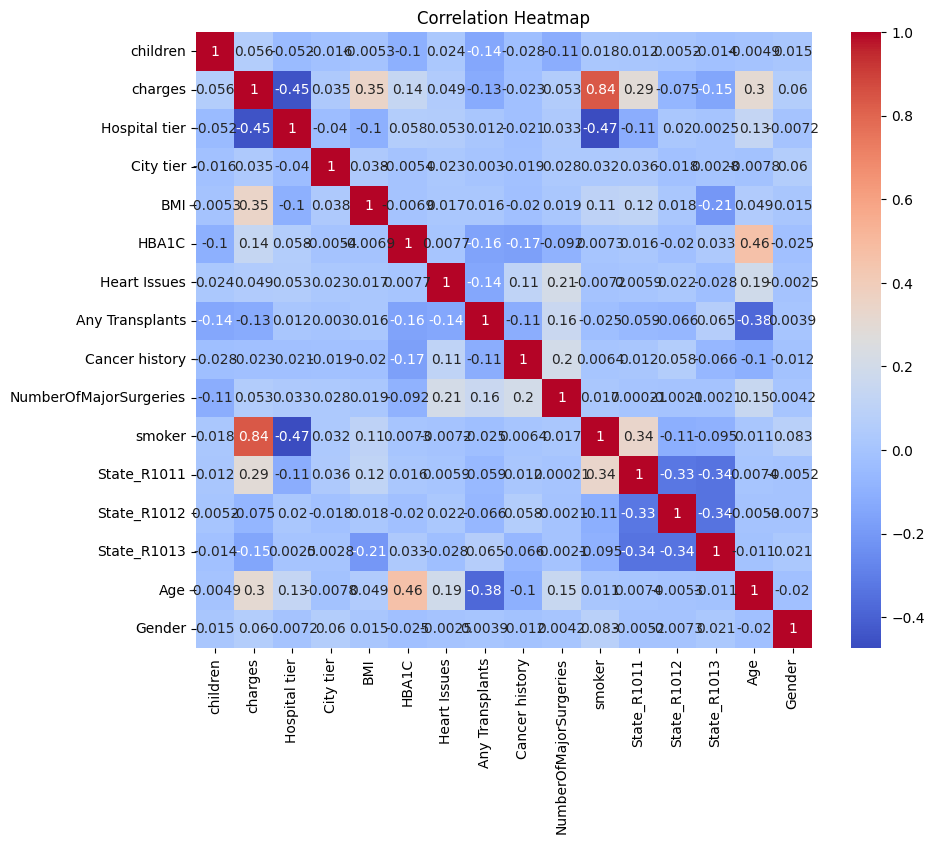

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [ ]:
#2. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:
#Split the data into features (X) and the target variable (y)
X = df.drop(['charges'], axis=1)
y = df['charges']

In [ ]:
X.shape

(2325, 15)

In [ ]:
y.shape

(2325,)

In [ ]:
#function to train and evaluate the model on each fold
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

#SGDRegressor

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
models = []
validation_scores = []
R2_score = []

for train_index, val_index in cv.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = make_pipeline(StandardScaler(), SGDRegressor())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    R2_sgd=r2_score(y_val, y_pred)
    models.append(model)
    validation_scores.append(rmse)
    R2_score.append(R2_sgd)

In [ ]:
#Print the validation scores for each fold
for fold, score in enumerate(validation_scores):
    print(f"Fold {fold+1}: RMSE = {score}")

Fold 1: RMSE = 4812.210425469586
Fold 2: RMSE = 4929.056589931018
Fold 3: RMSE = 3979.6950865829913
Fold 4: RMSE = 4202.124740481857
Fold 5: RMSE = 4457.946039529037


In [ ]:
RMSE_sgd = sum(validation_scores)/len(validation_scores)
RMSE_sgd

4476.2065763988985

In [ ]:
#Print the R2 scores for each fold
for fold, score in enumerate(R2_score):
    print(f"Fold {fold+1}: R2 = {score}")

Fold 1: R2 = 0.837654060654295
Fold 2: R2 = 0.8354244261867851
Fold 3: R2 = 0.8770029291507151
Fold 4: R2 = 0.8664466364219856
Fold 5: R2 = 0.8688506055388208


In [ ]:
R2_sgd = sum(R2_score)/len(R2_score)
R2_sgd

0.8570757315905203

In [ ]:
#Determine the variable importance scores using the final trained model
final_model = models[-3]  # Use the model from the last fold
importance_scores = final_model.named_steps['sgdregressor'].coef_
importance_scores

array([  486.40482349, -1167.35247113,    14.00494603,  2677.49394453,
          85.027407  ,  -101.31220453,   105.10321153,   163.91060926,
        -175.0730268 ,  9264.86665882,  -434.73210577,  -236.01027165,
        -653.16492769,  3434.71607088,    22.17547125])

In [ ]:
selected_features = X.columns[importance_scores != 0]
redundant_features = X.columns[importance_scores == 0]

In [ ]:
selected_features

Index(['children', 'Hospital tier', 'City tier', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'State_R1011', 'State_R1012',
       'State_R1013', 'Age', 'Gender'],
      dtype='object')

In [ ]:
redundant_features

Index([], dtype='object')

Case scenario:
Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 
12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s 
State ID is R1011. She lives with her partner and two children. She was found to be 
nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no 
transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be 
estimated using tier-1 hospitals

In [ ]:
df.columns


Index(['children', 'charges', 'Hospital tier', 'City tier', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'State_R1011', 'State_R1012',
       'State_R1013', 'Age', 'Gender'],
      dtype='object')

In [ ]:
df.head(1)

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_R1011,State_R1012,State_R1013,Age,Gender
0,0,563.84,2,3,17.58,4.51,0,0,0,1,0,0,0,1,30,1


In [ ]:
df['Cancer history'].unique()

array([0, 1])

In [ ]:
#test using usecase
data = {'children': [2],
        'Hospital tier': [1],
        'City tier': [1],
        'BMI': [85 / (1.7**2)],
        'HBA1C': [5.8],
        'Heart Issues': [0],
        'Any Transplants': [0],
        'Cancer history': [1],
        'NumberOfMajorSurgeries': [0],
        'smoker': [1],
        'State_R1011': [1],
        'State_R1012': [0],
        'State_R1013': [0],
        'Age': [34],
        'Gender': [0],
      }
        
input_data = pd.DataFrame(data)

In [ ]:
#predicted cost for miss jayna
predicted_costs= []
for model in models:
    predicted_cost = model.predict(input_data)
    predicted_costs.append(predicted_cost)

final_predicted_cost = sum(predicted_costs) / len(predicted_costs)

print(f"Predicted hospitalization cost for Ms. Jayna: {final_predicted_cost}")

Predicted hospitalization cost for Ms. Jayna: [31835.16495508]


The predicted hospitalization cost for Ms. Jayna using the stochastic gradient descent (SGD) regression algorithm is approximately $31,785.28.

#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
models_1 = []
validation_scores = []
R2_score = []


for train_index, val_index in cv.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    R2_rf=r2_score(y_val, y_pred)
  

    models_1.append(model)
    validation_scores.append(rmse)
    R2_score.append(R2_rf)
  

In [ ]:
#Print the validation scores for each fold
for fold, score in enumerate(validation_scores):
    print(f"Fold {fold+1}: RMSE = {score}")

Fold 1: RMSE = 3865.730889858857
Fold 2: RMSE = 4017.239557325537
Fold 3: RMSE = 2872.5548587998223
Fold 4: RMSE = 3186.36487779269
Fold 5: RMSE = 3628.5665615781004


In [ ]:
RMSE_rf=sum(validation_scores)/len(validation_scores)
RMSE_rf

3514.091349071002

In [ ]:
#Print the R2 scores for each fold
for fold, score in enumerate(R2_score):
    print(f"Fold {fold+1}: R2 = {score}")

Fold 1: R2 = 0.8952351859846276
Fold 2: R2 = 0.8906816091203535
Fold 3: R2 = 0.9359186232155936
Fold 4: R2 = 0.9232094174334601
Fold 5: R2 = 0.9131105870058711


In [ ]:
R2_rf = sum(R2_score)/len(R2_score)
R2_rf

0.9116310845519813

In [ ]:
#predicted cost for miss jayna
predicted_costs= []
for model in models_1:
    predicted_cost = model.predict(input_data)
    predicted_costs.append(predicted_cost)

final_predicted_cost = sum(predicted_costs) / len(predicted_costs)

print(f"Predicted hospitalization cost for Ms. Jayna: {final_predicted_cost}")

Predicted hospitalization cost for Ms. Jayna: [24767.2365]


The predicted hospitalization cost for Ms. Jayna using the random forest regression algorithm is approximately $25,309.39

#XGBRegressor

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
models_2 = []
validation_scores = []
R2_score = []

for train_index, val_index in cv.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    R2_xgb=r2_score(y_val, y_pred)
   
    models_2.append(model)
    validation_scores.append(rmse)
    R2_score.append(R2_xgb)
   

In [ ]:
#Print the validation scores for each fold
for fold, score in enumerate(validation_scores):
    print(f"Fold {fold+1}: RMSE = {score}")

Fold 1: RMSE = 3940.7949546058444
Fold 2: RMSE = 3995.7099284337255
Fold 3: RMSE = 3068.85307960118
Fold 4: RMSE = 3140.639655756391
Fold 5: RMSE = 3837.2301217113104


In [ ]:
RMSE_xgb=sum(validation_scores)/len(validation_scores)
RMSE_xgb

3596.64554802169

In [ ]:
#Print the R2 scores for each fold
for fold, score in enumerate(R2_score):
    print(f"Fold {fold+1}: R2 = {score}")

Fold 1: R2 = 0.8911270757298282
Fold 2: R2 = 0.8918502113707162
Fold 3: R2 = 0.9268612782993992
Fold 4: R2 = 0.9253975363382101
Fold 5: R2 = 0.9028299636972541


In [ ]:
R2_xgb = sum(R2_score)/len(R2_score)
R2_xgb

0.9076132130870815

In [ ]:
#predicted cost for miss jayna
predicted_costs= []
for model in models_2:
    predicted_cost = model.predict(input_data)
    predicted_costs.append(predicted_cost)

final_predicted_cost = sum(predicted_costs) / len(predicted_costs)

print(f"Predicted hospitalization cost for Ms. Jayna: {final_predicted_cost}")

Predicted hospitalization cost for Ms. Jayna: [26482.646]


The predicted hospitalization cost for Ms. Jayna using the XGBRegressor algorithm is $25,188.285.

1. Stochastic Gradient Descent (SGD) Regressor: The model has an RMSE of 4469.65. This indicates that, on average, the predicted hospitalization costs deviate from the actual costs by approximately $4469.65. The higher the RMSE, the larger the prediction errors. Therefore, the SGD Regressor may not be the most accurate model for cost prediction.

2. Random Forest (RF) Regressor: The model has a lower RMSE of 3507.32 compared to the SGD Regressor. This suggests that the RF Regressor performs better in predicting hospitalization costs, with lower average prediction errors. The RF Regressor takes into account the interactions among features and can capture complex relationships, resulting in improved accuracy.

3. XGBoost (XGB) Regressor: The model has an RMSE of 3669.18, which is slightly higher than the RF Regressor. However, it still performs better than the SGD Regressor. XGBoost is a powerful algorithm that combines the strengths of gradient boosting and regularization techniques, resulting in accurate predictions





based on the RMSE values, the Random Forest Regressor shows the lowest prediction errors and can be considered the most reliable model for estimating hospitalization costs